# Data Visualization for Homicide Reports across US from 1984


Reading the Data Frame from the csv file

In [22]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import json
import folium

# import the csv files into dataframes
Homicidedataframe = DataFrame(pd.read_csv('HomicideReport.csv'))
Homicidedataframe

ImportError: No module named branca.colormap

Select the Report based on State and Incident

In [ ]:
AllStateReport = Homicidedataframe[['State','Incident']]

Dropping any Unknown Variables in the two columns

In [ ]:
AllStateReport = AllStateReport.replace('Unknown', np.nan)
AllStateReport = AllStateReport.dropna()

Getting the sum of each state's Incident Report

In [ ]:
StateGroupReport = AllStateReport.groupby('State',as_index=False).sum()
StateGroupReport

Forming a barchart for each state

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(range(51), StateGroupReport.Incident,
         align='center')

plt.xticks(range(51), StateGroupReport.index )

ax.set_ylabel('Incident')

ax.set_xlabel('State Index')

plt.title('Homocide In States for last 35 years')

plt.show()

StateGroupReport[['State']]

Getting the top 5 States with most Incidents

In [ ]:
TopFiveStates = StateGroupReport.sort_values('Incident',ascending=False).head(5)
TopFiveStates

Drawing a pie chart for top 5 states

In [ ]:
plt.axis('equal');
plt.rcParams['font.size'] = 9.0
plt.pie(TopFiveStates.Incident,labels=TopFiveStates.State);
plt.show()

Selecting the report for Relationships

In [ ]:
RelationShipDF = Homicidedataframe[['Relationship','Incident']]
RelationShipDF

Getting the sum of Incidents for Relationship

In [ ]:
RelationShipDFGroup = RelationShipDF.groupby('Relationship',as_index=False).sum()
RelationShipDFGroup.sort_values('Incident',ascending=False)

Printing a bar chart for the relationship and incident after removing unknown

In [ ]:
RelationShipDFGroup = RelationShipDFGroup[RelationShipDFGroup.Relationship != 'Unknown']

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(range(27), RelationShipDFGroup.Incident,
         align='center')

plt.xticks(range(27), RelationShipDFGroup.index )

ax.set_ylabel('Incident')

ax.set_xlabel('Relationship Index')

plt.title('RelationShip Graph')

plt.show()

RelationShipDFGroup[['Relationship']]

Getting top 5 Relationship

In [ ]:
TopFiveRelationship = RelationShipDFGroup.sort_values('Incident',ascending=False).head(5)
TopFiveRelationship

Drawing a Piechart for top 5 Relationship

In [ ]:
plt.axis('equal');
plt.rcParams['font.size'] = 9.0
plt.pie(TopFiveRelationship.Incident,labels=TopFiveRelationship.Relationship);
plt.show()

Grouping the Report for Weapon

In [ ]:
WeaponDF = Homicidedataframe[['Weapon','Incident']]
WeaponDF = WeaponDF.groupby('Weapon',as_index=False).sum()
WeaponDF

Removing the unknown weapon

In [ ]:
WeaponDF = WeaponDF[WeaponDF.Weapon != 'Unknown']
WeaponDF

Pie Chart for top 5 Weapons

In [ ]:
WeaponDF = WeaponDF.sort_values('Incident',ascending=False).head(5)
plt.axis('equal');
plt.rcParams['font.size'] = 15.0
fig = plt.gcf()
fig.set_size_inches(10,10) 
plt.pie(WeaponDF.Incident,labels=WeaponDF.Weapon);
plt.show()

Draw Line Graph for Relationship - Year - Incident Relationship

In [ ]:
RelationshipYearDF = Homicidedataframe[['Year','Relationship','Incident']]
RelationshipYearDF

Group By Year and Relationship

In [ ]:
RelationshipYearDF = RelationshipYearDF.groupby(['Year', 'Relationship'],as_index=False).sum()
RelationshipYearDF

Getting the top 5 Relationship apart from Unknown and Stranger

In [ ]:
TopFiveRelationShipDFGroup = RelationShipDFGroup.sort_values('Incident',ascending=False)
TopFiveRelationShipDFGroup = TopFiveRelationShipDFGroup[~TopFiveRelationShipDFGroup.Relationship.isin(['Unknown','Stranger'])].head(5)
TopFiveRelationShipDFGroup

Pivot the table for top 5 Relationship

In [ ]:
RelationshipYearDF = RelationshipYearDF[RelationshipYearDF.Relationship.isin(TopFiveRelationShipDFGroup.Relationship)]
RelationshipYearDF = RelationshipYearDF.pivot(index='Year', columns='Relationship', values='Incident')
RelationshipYearDF

Draw Line Graph

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
RelationshipYearDF.plot()
plt.show()

Getting Year wise Incident Count

In [ ]:
YearWiseIncident = Homicidedataframe[['Year','Incident']]
YearWiseIncident = YearWiseIncident.groupby('Year',as_index=False).sum()
YearWiseIncident

Histogram for Incident Count in Each Year

In [ ]:
plt.rcParams['font.size'] = 9.0
plt.hist(YearWiseIncident.Incident, 10, histtype='stepfilled',
         align='mid', color='g', label='Homicide Report Per Year Count')
plt.legend()
plt.title('Homicide Report Histogram')
plt.show()

Getting Perpetrator Race Data

In [ ]:
RaceHomicideDF = Homicidedataframe[['Year','Perpetrator Race','Incident']]
RaceHomicideDF = RaceHomicideDF[RaceHomicideDF['Perpetrator Race']!='Unknown']
RaceHomicideDF = RaceHomicideDF.groupby(['Year', 'Perpetrator Race'],as_index=False).sum()
RaceHomicideDF

Pivot Table

In [ ]:
RaceHomicideDF=RaceHomicideDF.pivot(index='Year', columns='Perpetrator Race', values='Incident')
RaceHomicideDF=RaceHomicideDF.fillna(0)
RaceHomicideDF

Draw Scatter Plot for Perpetrator Race

In [ ]:
rcParams['figure.figsize'] = 10, 10
Asian = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Asian/Pacific Islander'],color='Blue')
Black = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Black'],color='Black')
NativeAmerican = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Native American/Alaska Native'],color='Red')
White = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['White'],color='Yellow')
plt.legend((Asian, Black, NativeAmerican, White),
           ('Asian/Pacific Islander', 'Black', 'Native American/Alaska Native', 'White'),
           loc='upper left',)
plt.show()

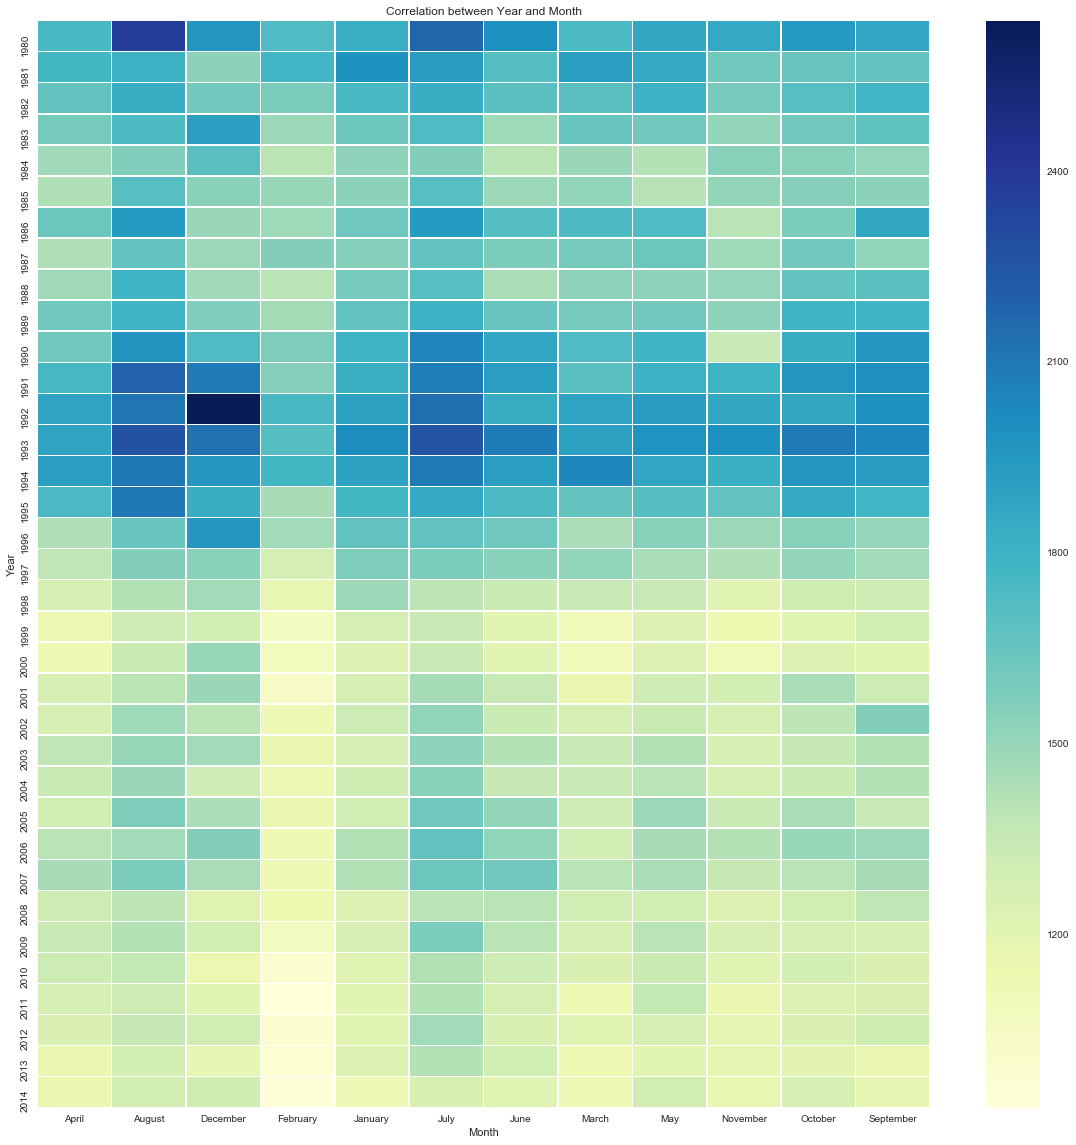

In [10]:
sns.set_style('whitegrid')
homicide_stats = pd.io.parsers.read_csv("HomicideReport.csv", low_memory=False)
year_month=homicide_stats.groupby(['Year','Month'], as_index= False).size().reset_index(name='count')
#year_month
hs2=pd.pivot_table(year_month,index='Year',columns='Month',values='count')
data=hs2
plt.figure(figsize=(20,20))
sns.heatmap(data,linewidths=.5,cmap="YlGnBu" ) 
plt.title('Correlation between Year and Month')

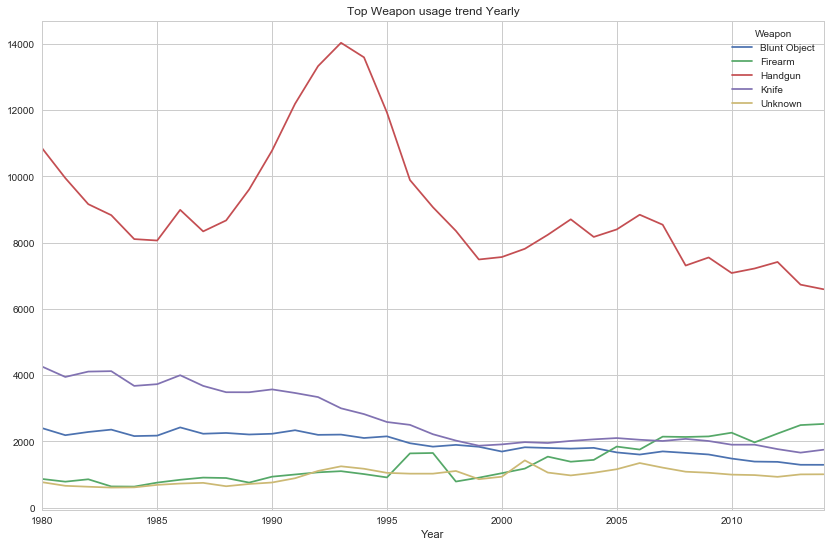

In [13]:
top_weapon = homicide_stats.groupby(['Weapon'], as_index= False).size().reset_index(name='count').sort_values('count',ascending=False).head()
weapon_stats=homicide_stats.groupby(['Year','Weapon'], as_index= False).size().reset_index(name='count')
weapon_stats=weapon_stats[weapon_stats.Weapon.isin(top_weapon.Weapon)]
#weapon_stats
ws=pd.pivot_table(weapon_stats, index='Year',columns='Weapon',values='count')
ws.plot(title = 'Top Weapon usage trend Yearly',kind='line',grid=True,figsize=(14,9))

In [14]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_abb_df = pd.DataFrame()
state_abb_df['Code'] = states_abbrev.keys()
state_abb_df['State'] = states_abbrev.values()

state_abb_df. head()

,Code,State
0,WA,Washington
1,WI,Wisconsin
2,WV,West Virginia
3,FL,Florida
4,WY,Wyoming


In [16]:
state_geo = json.load(file('us-states.json'))


state_report = homicide_stats.groupby(['State']).size().reset_index(name='Average_homicides_per_year')
state_report['Average_homicides_per_year'] = state_report['Average_homicides_per_year'].div(34) 
state_report = pd.merge(state_report, state_abb_df, on='State', how='inner')
state_report.head()

,State,Average_homicides_per_year,Code
0,Alabama,334.588235,AL
1,Alaska,47.558824,AK
2,Arizona,378.558824,AZ
3,Arkansas,204.323529,AR
4,California,2934.794118,CA


In [53]:
state_geo = r'us-states.json'
state_report=state_report[['Code','Average_homicides_per_year']]
#state_report

map = folium.Map(location=[40, -99], zoom_start=4)
map.geo_json(geo_path=state_geo, data=state_report,
             columns=['Code', 'Average_homicides_per_year'],
             key_on='feature.id',
             threshold_scale = [0,300,600,1000,2000,3000], #[0,300,600,900,1200,1500,1800,2100,2400,2700,3000],
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Average Crime rate statewise')
map